In [12]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

In [31]:
metalcore_data = pd.read_csv('Data/Metalcore.csv',header=None)
# print(metalcore_data.head())
classical_data = pd.read_csv('Data/Classical.csv',header=None)
silence_data = pd.read_csv('Data/Silence.csv',header=None)
tv_data = pd.read_csv('Data/TV.csv',header=None)
audiobook_data = pd.read_csv('Data/Audiobook.csv',header=None)
country_data = pd.read_csv('Data/Country.csv',header=None)

In [11]:
metalcore_data.describe()

,0
count,360.000000
mean,24.262139
std,2.474936
min,15.750000
25%,22.622500
50%,24.305000
75%,25.802500
max,30.750000


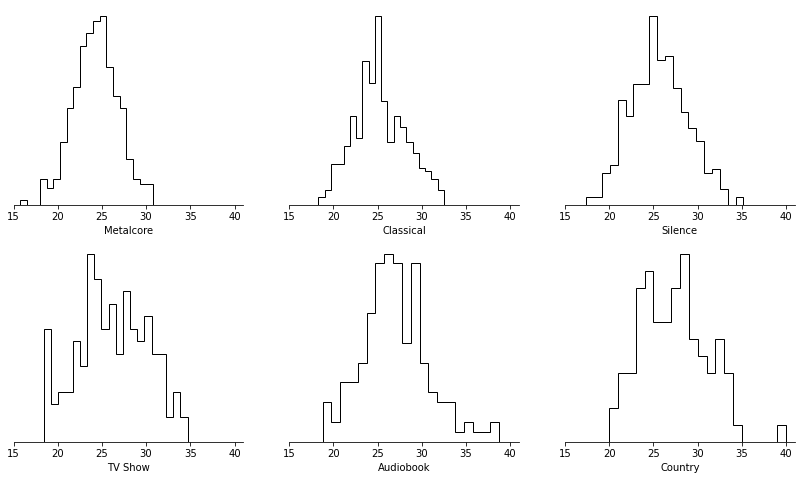

In [85]:
hist_small_multiple = plt.figure(figsize=(14,8))

ax1 = plt.subplot(231)
ax1.hist(metalcore_data, 20, histtype='step', color='black')
# plt.title('Metalcore')
plt.xlabel('Metalcore')
plt.yticks([])
plt.xlim([15, 41])
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
#
ax2 = plt.subplot(232)
ax2.hist(classical_data, 20, histtype='step', color='black')
# plt.title('Classical')
plt.xlabel('Classical')
plt.yticks([])
plt.xlim([15, 41])
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
#
ax3 = plt.subplot(233)
ax3.hist(silence_data, 20, histtype='step', color='black')
# plt.title('Silence')
plt.xlabel('Silence')
plt.yticks([])
plt.xlim([15, 41])
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
#
ax4 = plt.subplot(234)
ax4.hist(tv_data, 20, histtype='step', color='black')
# plt.title('TV Show')
plt.xlabel('TV Show')
plt.yticks([])
plt.xlim([15, 41])
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
#
ax5 = plt.subplot(235)
ax5.hist(audiobook_data, 20, histtype='step', color='black')
# plt.title('Audiobook')
plt.xlabel('Audiobook')
plt.yticks([])
plt.xlim([15, 41])
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
#
ax6 = plt.subplot(236)
ax6.hist(country_data, 20, histtype='step', color='black')
# plt.title('Country')
plt.xlabel('Country')
plt.yticks([])
plt.xlim([15, 41])
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['right'].set_visible(False)
# ax6.spines['bottom'].set_color('dimgray')


plt.show()

In [87]:
hist_small_multiple.savefig('Images\Hist_Small_Multiple.png', dpi=300)